In [1]:
# Test out nilearn's BIDS output function

In [2]:
from nilearn.datasets import fetch_spm_multimodal_fmri
from nilearn.reporting import save_glm_results
from nilearn.glm.first_level import FirstLevelModel, make_first_level_design_matrix
from nilearn.image import concat_imgs, resample_img, mean_img
import numpy as np
import pandas as pd

subject_data = fetch_spm_multimodal_fmri()

/Users/taylor/Documents/tsalo/nilearn/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [3]:
tr = 2.  # repetition time, in seconds
slice_time_ref = 0.  # we will sample the design matrix at the beggining of each acquisition
drift_model = 'Cosine'  # We use a discrete cosine transform to model signal drifts.
high_pass = .01  # The cutoff for the drift model is 0.01 Hz.
hrf_model = 'spm + derivative'  # The hemodynamic response function is the SPM canonical one.

In [4]:
fmri_img = [concat_imgs(subject_data.func1, auto_resample=True),
            concat_imgs(subject_data.func2, auto_resample=True)]
affine, shape = fmri_img[0].affine, fmri_img[0].shape
print('Resampling the second image (this takes time)...')
fmri_img[1] = resample_img(fmri_img[1], affine, shape[:3])

/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affin

/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affin

/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affin

/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affin

/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affin

/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affin

/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affin

/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affin

/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affin

/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affin

/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affin

/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affin

/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affin

/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affin

/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affin

/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affin

/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affin

/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affin

/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affin

/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affin

/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affin

/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affin

/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affin

/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affin

/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affin

/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affin

/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affin

/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affin

/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affin

/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affin

/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affin

/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affin

/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affin

/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affin

/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affin

/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affin

/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg_conversions.py:150: UserWarning: Affine is different across subjects. Realignement on first subject affin

Resampling the second image (this takes time)...


In [5]:
design_matrices = []

In [6]:
for idx, img in enumerate(fmri_img, start=1):
    # Build experimental paradigm
    n_scans = img.shape[-1]
    events = pd.read_table(subject_data['events{}'.format(idx)])
    # Define the sampling times for the design matrix
    frame_times = np.arange(n_scans) * tr
    # Build design matrix with the reviously defined parameters
    design_matrix = make_first_level_design_matrix(
            frame_times,
            events,
            hrf_model=hrf_model,
            drift_model=drift_model,
            high_pass=high_pass,
            )

    # put the design matrices in a list
    design_matrices.append(design_matrix)

In [7]:
contrast_matrix = np.eye(design_matrix.shape[1])
basic_contrasts = dict([(column, contrast_matrix[i])
                        for i, column in enumerate(design_matrix.columns)])

In [8]:
contrasts = {
    'faces-scrambled': basic_contrasts['faces'] - basic_contrasts['scrambled'],
    'scrambled-faces': -basic_contrasts['faces'] + basic_contrasts['scrambled'],
    'effects_of_interest': np.vstack((basic_contrasts['faces'],
                                      basic_contrasts['scrambled']))
}

In [9]:
print('Fitting a GLM')
fmri_glm = FirstLevelModel(minimize_memory=False)
fmri_glm = fmri_glm.fit(fmri_img, design_matrices=design_matrices)

Fitting a GLM


/Users/taylor/Documents/tsalo/nilearn/nilearn/glm/first_level/first_level.py:581: UserWarning: One contrast given, assuming it for all 2 runs
  warn('One contrast given, assuming it for all %d runs' % n_runs)
/Users/taylor/Documents/tsalo/nilearn/nilearn/glm/contrasts.py:352: UserWarning: Running approximate fixed effects on F statistics.
  warn('Running approximate fixed effects on F statistics.')
/Users/taylor/Documents/tsalo/nilearn/nilearn/reporting/glm_reporter.py:976: UserWarning: Contrast name 'faces-scrambled' changed to 'facesscrambled'
  warnings.warn(f"Contrast name '{contrast_name}' changed to '{new_name}'")
/Users/taylor/Documents/tsalo/nilearn/nilearn/reporting/glm_reporter.py:976: UserWarning: Contrast name 'scrambled-faces' changed to 'scrambledfaces'
  warnings.warn(f"Contrast name '{contrast_name}' changed to '{new_name}'")
/Users/taylor/Documents/tsalo/nilearn/nilearn/reporting/glm_reporter.py:976: UserWarning: Contrast name 'effects_of_interest' changed to 'effectso

Extracting and saving residuals


/Users/taylor/Documents/tsalo/nilearn/nilearn/glm/regression.py:359: FutureWarning: 'resid' from RegressionResults has been deprecated and will be removed. Please use 'residuals' instead.
  warnings.warn("'resid' from RegressionResults "


Extracting and saving r_square


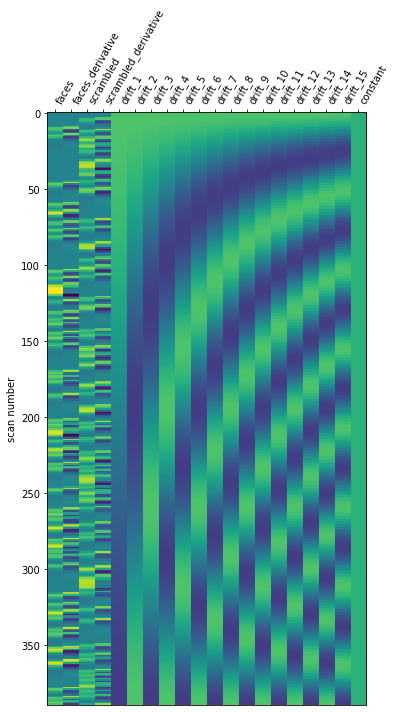

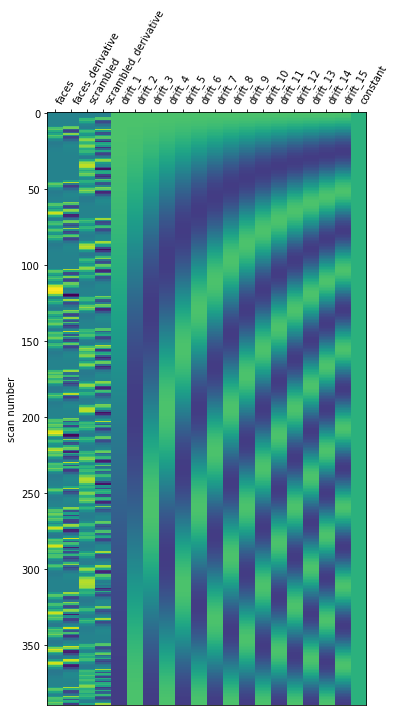

In [10]:
save_glm_results(fmri_glm, contrasts, out_dir=".")